In [5]:
#kütüphaneleri içe aktaralım
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [6]:
#veri setini içe aktaralım
df = pd.read_csv('poly_reg_dataset.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
#sayısal değerlere göz gezdirelim
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


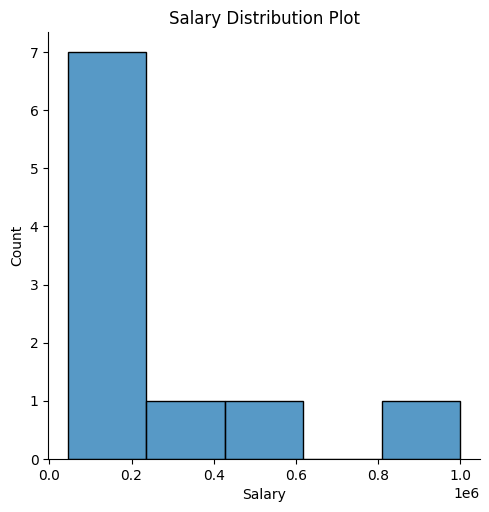

In [8]:
#dağılım grafiğine bakalım
sns.displot(df['Salary'])
plt.title('Salary Distribution Plot')
plt.show();

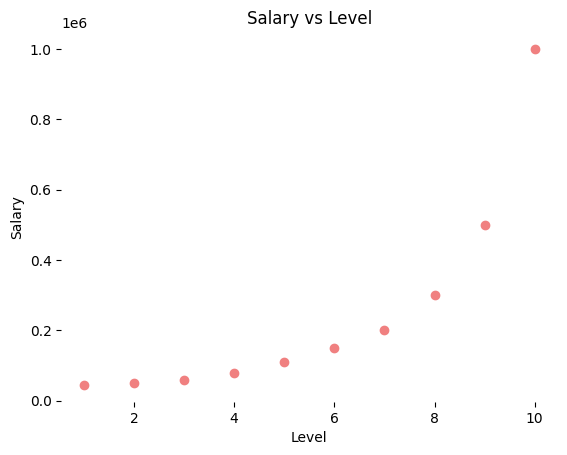

In [9]:
#aradaki ilişkiyi görselleştirelim
plt.scatter(df['Level'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [10]:
X = df.iloc[:, 1:-1].values  #son değer hariç hepsini al
y = df.iloc[:, -1].values #son değeri al

In [11]:
# veri setini lineer regresyon ile eğitelim
lr = LinearRegression()
lr.fit(X, y)

# Veri setini polinomal regresyon ile eğitelim
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

In [12]:
# Sonuçlara göz gezdirelim
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression

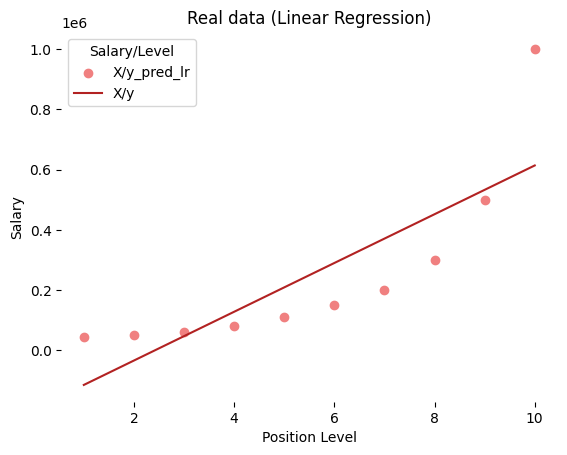

In [13]:
#lineer regresyon sonuçlarını görselleştirelim
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

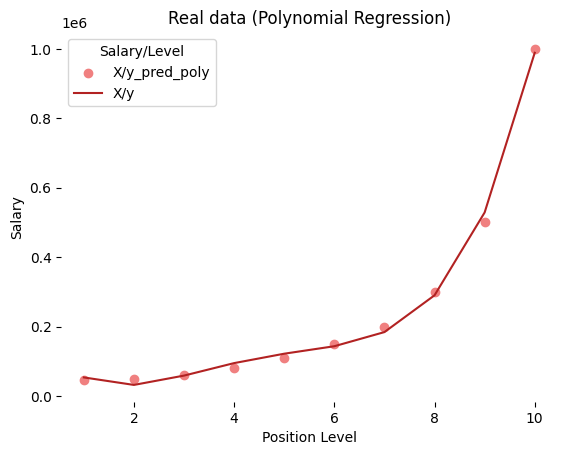

In [14]:
# Polinomal regresyon sonuçlarını görselleştirelim

plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [15]:
# lineer regresyon ile yeni bir tahmin yapalım
print(f'Linear Regression result : {lr.predict([[7.5]])}')

# Polinomal regresyon ile tahmin yapalım
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[7.5]]))}')

Linear Regression result : [411257.57575758]
Polynomial Regression result : [225126.29297782]
